<a href="https://colab.research.google.com/github/Chandra-data-ent/Chandra-data-ent/blob/main/1_Player_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

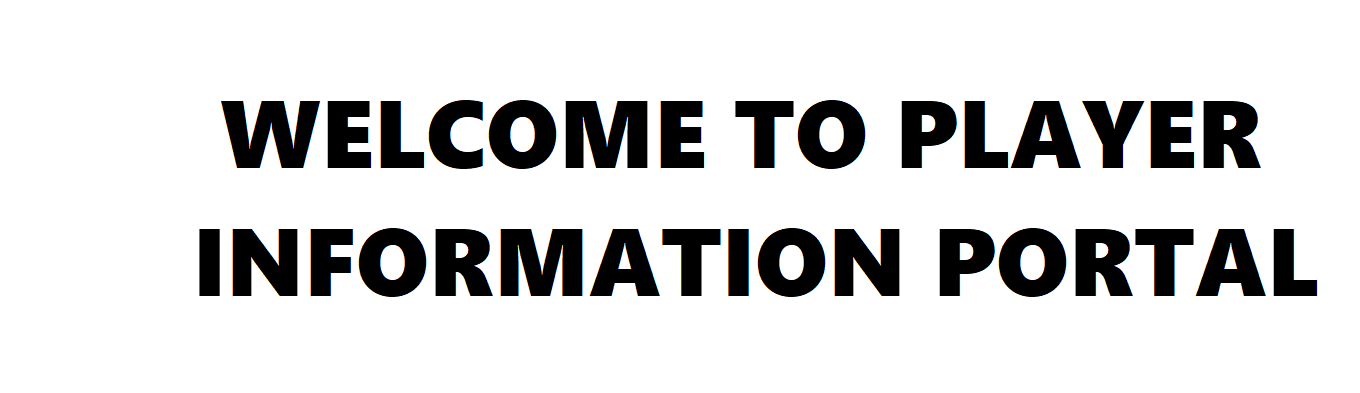

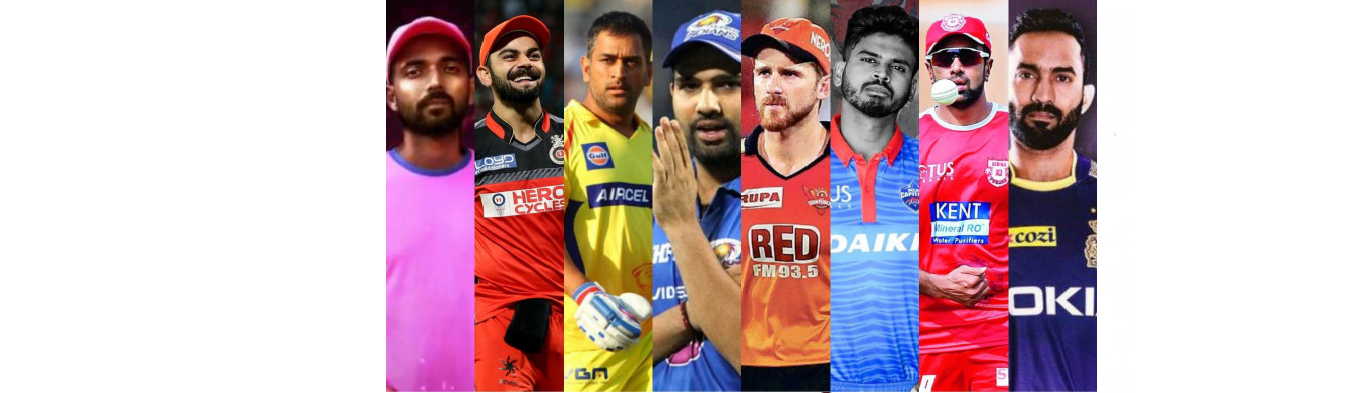

In [ ]:
#@title **Load players information by clicking the button below.**
import pandas as pd
file_path = "/Players.csv"
players = pd.read_csv(file_path)

print(players.head())


      Player_Name        DOB Batting_Hand         Bowling_Skill Country
0  A Ashish Reddy  24-Feb-91   Right_Hand      Right-arm medium   India
1      A Chandila   5-Dec-83   Right_Hand    Right-arm offbreak   India
2        A Chopra  19-Sep-77   Right_Hand    Right-arm offbreak   India
3     A Choudhary        NaN   Right_hand  Left-arm fast-medium     NaN
4     A Dananjaya        NaN   Right_Hand    Right-arm offbreak     NaN


In [ ]:
#@title **Update the player list by deleting the abstained country players. (Example: Pakisthan)**
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

players = players[players['Country'] != 'Pakistan']
players.replace('Right_hand', 'Right_Hand', inplace=True)


# Get the number of records in the dataframe
num_records = len(players)

# Print the number of records



# Assuming your dataframe is already loaded and named 'players'
# Replace 'players' with your actual dataframe name if different

# Get the number of records in the dataframe
num_records = len(players)

# Print the number of records
print("Number of players after updating:", num_records)


Number of players after updating: 553


In [ ]:
#@title **Sample list of the playersafter updating. (Example: Pakisthan)**
# Drop rows with missing values
players.dropna(inplace=True)

# Remove leading/trailing whitespaces from column names
players.columns = players.columns.str.strip()

# Rename the columns
players.rename(columns={
    'Player_Name': 'Player Name',
    'DOB': 'Date of Birth',
    'Batting_Hand': 'Batting Hand',
    'Bowling_Skill': 'Bowling Skill',
    'Country': 'Country'
}, inplace=True)

# Clean the 'Player Name' column
players['Player Name'] = players['Player Name'].str.strip()

# Clean the 'Date of Birth' column
players['Date of Birth'] = pd.to_datetime(players['Date of Birth'], errors='coerce')

# Clean the 'Batting Hand' column
players['Batting Hand'] = players['Batting Hand'].str.upper()

# Clean the 'Bowling Skill' column
players['Bowling Skill'] = players['Bowling Skill'].str.capitalize()

# Clean the 'Country' column
players['Country'] = players['Country'].str.strip()

# Print the cleaned dataframe
print(players.head())


      Player Name Date of Birth Batting Hand          Bowling Skill  Country
0  A Ashish Reddy    1991-02-24   RIGHT_HAND       Right-arm medium    India
1      A Chandila    1983-12-05   RIGHT_HAND     Right-arm offbreak    India
2        A Chopra    1977-09-19   RIGHT_HAND     Right-arm offbreak    India
5      A Flintoff    1977-12-06   RIGHT_HAND  Right-arm fast-medium  England
8        A Kumble    2070-10-17   RIGHT_HAND        Legbreak googly    India


In [ ]:
#@title **Enter player's name to see his origin & Details.**
while True:
    # Get user input for player name
    player_name = input("Enter player name: ")

    # Filter the dataset for the specific player
    player_stats = players[players['Player Name'].str.contains(player_name, case=False)]

    # Check if the player exists in the dataset
    if len(player_stats) > 0:
        print("Player Stats:")
        print(player_stats)
    else:
        print("Player not found.")

    # Ask if the user wants to see stats of another player
    while True:
        another_player = input("Do you want to see the stats of another player? (Yes/No): ")
        if another_player.lower() == "yes":
            break
        elif another_player.lower() == "no":
            print("Thank you!")
            break  # Exit the outer while loop
        else:
            print("Invalid entry!")

    if another_player.lower() == "no":
        break  # Exit the outer while loop

Enter player name: Sharma
Player Stats:
         Player Name Date of Birth Batting Hand           Bowling Skill  \
52      Ankit Sharma    1991-04-20    LEFT_HAND  Slow left-arm orthodox   
86      Bipul Sharma    1983-09-28    LEFT_HAND  Slow left-arm orthodox   
184         I Sharma    1988-09-02   RIGHT_HAND   Right-arm fast-medium   
219  Joginder Sharma    1983-10-23   RIGHT_HAND   Right-arm fast-medium   
254        KV Sharma    1987-10-23    LEFT_HAND         Legbreak googly   
313        MM Sharma    1988-09-18   RIGHT_HAND        Right-arm medium   
389         R Sharma    1987-04-30   RIGHT_HAND      Right-arm offbreak   
402        RG Sharma    1987-04-30   RIGHT_HAND      Right-arm offbreak   
459   Sandeep Sharma    1993-05-18   RIGHT_HAND        Right-arm medium   
472    Shivam Sharma    1993-09-09   RIGHT_HAND      Right-arm offbreak   

    Country  
52    India  
86    India  
184   India  
219   India  
254   India  
313   India  
389   India  
402   India  
459   In

In [ ]:
#@title **Enter the country name and mode of play to see their players in IPL.**
while True:
    # Get user input for country
    country = input("Enter the country of the players you want to see: ")

    # Filter the dataset for the specific country
    country_players = players[players['Country'].str.lower() == country.lower()]

    if len(country_players) == 0:
        print("No players found from the specified country.")
    else:
        # Get user input for player type (Batsman/Bowler)
        player_type = input("Enter the player type (Batsman/Bowler): ")

        if player_type.lower() == "batsman":
            # Get user input for batting hand (Right/Left)
            batting_hand = input("Enter the batting hand (Right/Left): ")

            # Convert user input to standardized format
            if batting_hand.lower() == "right":
                batting_hand = "Right_Hand"
            elif batting_hand.lower() == "left":
                batting_hand = "Left_Hand"

            # Filter the dataset for the specified batting hand
            filtered_players = country_players[country_players['Batting Hand'].str.upper() == batting_hand.upper()]
        elif player_type.lower() == "bowler":
            filtered_players = country_players  # No specific filtering for bowlers
        else:
            print("Invalid player type entered.")
            continue  # Restart the loop

        if len(filtered_players) == 0:
            print("No players found with the specified criteria.")
        else:
            # Display the total count of players
            print(f"Total Players: {len(filtered_players)}")
            print()

            # Display the player names, batting hand, and bowling skill
            print("Player Details:")
            for index, player_row in filtered_players.iterrows():
                print(f"{index+1}. Player Name: {player_row['Player Name']}")
                print(f"   Batting Hand: {player_row['Batting Hand']}")
                print(f"   Bowling Skill: {player_row['Bowling Skill']}")
                print()

    # Ask if the user wants to see players from another country and type
    while True:
        another_request = input("Do you want to see players from another country and type? (Yes/No): ")
        if another_request.lower() == "yes":
            break
        elif another_request.lower() == "no":
            print("Thank you!")
            break  # Exit the outer while loop
        else:
            print("Invalid entry!")

    if another_request.lower() == "no":
        break  # Exit the outer while loop


Enter the country of the players you want to see: Australia
Enter the player type (Batsman/Bowler): Batsman
Enter the batting hand (Right/Left): Right
Total Players: 46

Player Details:
17. Player Name: A Symonds
   Batting Hand: RIGHT_HAND
   Bowling Skill: Right-arm offbreak

20. Player Name: A Zampa
   Batting Hand: RIGHT_HAND
   Bowling Skill: Legbreak googly

25. Player Name: AA Noffke
   Batting Hand: RIGHT_HAND
   Bowling Skill: Right-arm fast-medium

30. Player Name: AB McDonald
   Batting Hand: RIGHT_HAND
   Bowling Skill: Right-arm fast-medium

35. Player Name: AC Voges
   Batting Hand: RIGHT_HAND
   Bowling Skill: Slow left-arm orthodox

43. Player Name: AJ Finch
   Batting Hand: RIGHT_HAND
   Bowling Skill: Slow left-arm orthodox

72. Player Name: B Geeves
   Batting Hand: RIGHT_HAND
   Bowling Skill: Right-arm fast-medium

74. Player Name: B Laughlin
   Batting Hand: RIGHT_HAND
   Bowling Skill: Right-arm fast-medium

75. Player Name: B Lee
   Batting Hand: RIGHT_HAND
   B